### GEOPH-526 : Signal Processing in Geophysics.
##### Department of Physics,  University of Alberta, Fall 2021.


**Professor**: Mauricio D. Sacchi

**Student**: Joaquín Acedo

**email**: aacedo@ualberta.ca



In [1]:
#load packages
using DSP, FFTW, DelimitedFiles, PolynomialRoots, LinearAlgebra, PyPlot



In [2]:
#define some plot parameters:

font_title=25;
font_label=20;
font_tick=12;
labelpad= 10.0;
pad=10.0;
marker_size=10.0;
colors=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"];


## Assignment 3: 

#### 1. Find the roots of the following sequences after in the z-domain. Separate them in minimum phase, maximum phase or mixed phase.

In [3]:
w_a=[3,1];
w_b=[3,-5];
w_c=[4,4,5,-1,3,2];
w_d=[3,-3,1,3,5,0,1];
w_e=vec(readdlm("wavelet.txt"));

W=[w_a,w_b,w_c,w_d,w_e]; #vector of vectors.
R=[roots(W[1]),roots(W[2]),roots(W[3]),roots(W[4]),roots(W[5])]; #roots

-------------------- wavelet 1 --------------------
 

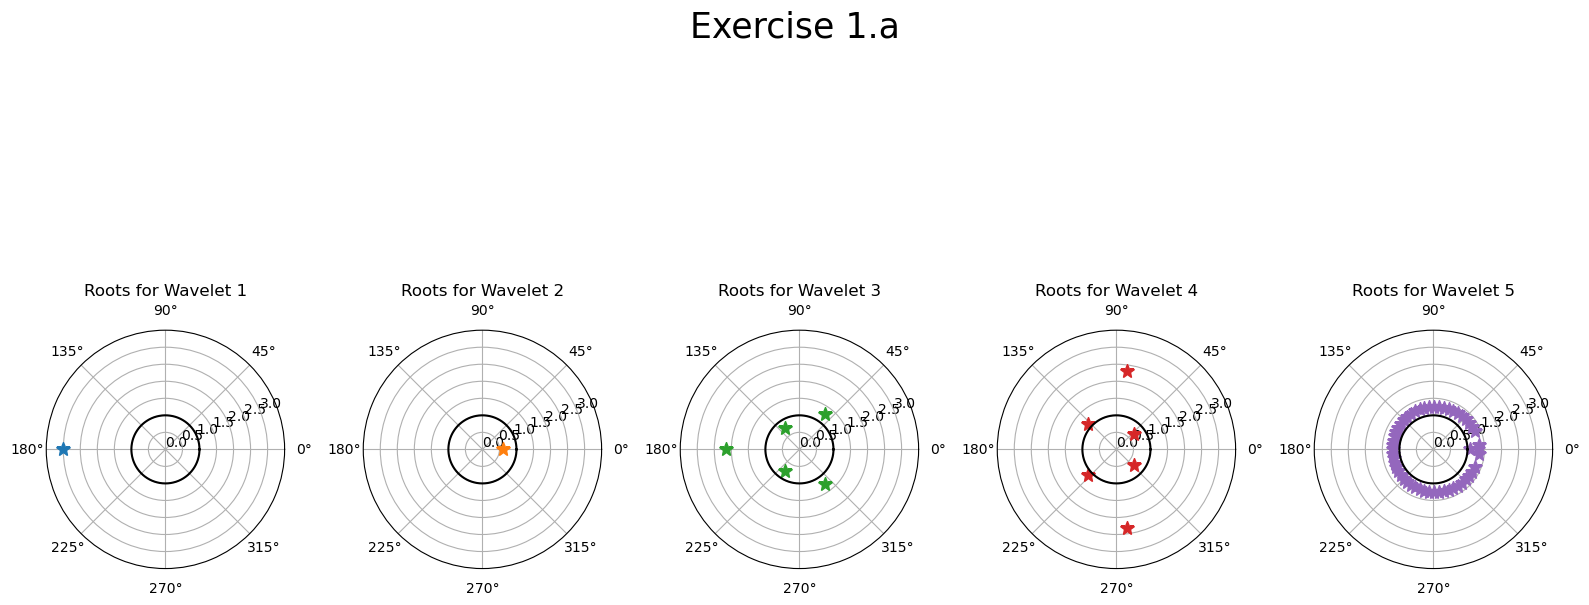


The wavelet 1 is minimum phase
 
-------------------- wavelet 2 --------------------
 
The wavelet 2 is maximum phase
 
-------------------- wavelet 3 --------------------
 
The wavelet 3 has a mixed phase
 
-------------------- wavelet 4 --------------------
 
The wavelet 4 has a mixed phase
 
-------------------- wavelet 5 --------------------
 
The wavelet 5 is minimum phase
 


In [4]:
## Polar Plots ##

# Unit circle
dθ=2π/1024; 
θ = collect(0:dθ:2π)
𝓇 = ones(length(θ))

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(16,8), subplot_kw= Dict("projection" => "polar"))
fig.tight_layout(h_pad=3)
fig.suptitle("Exercise 1.a",fontsize=font_title, y= 1.05 )


for i in 1:length(R)
    axs[i].set_title("Roots for Wavelet $i")
    axs[i].plot(angle.(R[i]), abs.(R[i]),c=colors[i],"*", markersize=marker_size)
    axs[i].plot(θ,𝓇, c="k")
    axs[i].set_rmax(3.5)
    axs[i].set_rticks(collect(0:0.5:3))  # Less radial ticks
end



#Root Classifier:

for j in 1:length(R)
    println("-------------------- wavelet $j --------------------")
    println(" ")
    if all(abs.(R[j]) .> 1)
        println("The wavelet $j is minimum phase")        
    elseif all((abs.(R[j])) .< 1)
        println("The wavelet $j is maximum phase")
    else
        println("The wavelet $j has a mixed phase")
    end
    println(" ")
end


#### 2.  Decompose the wavelet  $\vec{w} = (-1.0,1.9,8.4,0.4,-1.6)$ as the convolution of a minimum phase and a maximum phase wavelet:

$$ W\left(z\right)=W_{min}\left(z\right) W_{max}\left(z\right)$$

$$w_{n}= w_{min} \ast w_{max}$$


In [5]:
w2= [-1.0,1.9,8,0.4,-1.6]; # wavelet
r2=roots(w2); #roots using PolynomialRoots package.

In [6]:
"""
This function computes the convolution of two series x and h as a sum.
"""
function convolution(x :: Vector{Float64} , h :: Vector{Float64}) 
    
    Nx=length(x);
    Nh=length(h);
    Ny=Nx+Nh-1;
    y=zeros(Float64,Ny);
    
    for k=1:Nh;
        for n=1:Nx;
            y[k+n-1]= y[k+n-1]+ h[k]*x[n];
        end
    end
    
    return y

end


"""
This function computes the convolution of two series x and h as a sum.
"""
function convolution(x :: Vector{Float64} , h :: Vector{ComplexF64}) 
    
    Nx=length(x);
    Nh=length(h);
    Ny=Nx+Nh-1;
    y=zeros(Float64,Ny);
    
    for k=1:Nh;
        for n=1:Nx;
            y[k+n-1]= y[k+n-1]+ h[k]*x[n];
        end
    end
    
    return y

end



convolution

In [7]:
# Root method to obtain to vectors:

# wmin>>>>> with the roots outside the unit circle.
# wmax >>>> with the roots inside the unit circle.


wmin= [1.0];
wmax= [1.0];

for j in 1:length(r2)
    if abs(r2[j]) > 1
        dmin=[1.0,-1.0/r2[j]]
        wmin=convolution(wmin,dmin)
    elseif abs(r2[j]) < 1
        dmax=[1,-1.0/r2[j]]
        wmax=convolution(wmax,dmax)
    end
end


wmax_r = real(wmax); #real part of wmax
wmin_r= real(wmin); #realpart of wmin

w_equivalent=convolution(wmin_r,wmax_r);

#λ=sum(abs.(wmax))/sum(abs.(wmin))


Are w2 and w_equivalent equal?

In [8]:
println("Answer: ", round.(w2,digits=5) == round.(w_equivalent,digits=5))
println(" ")
println("w2","  |", " w_equivalent")

[w2 w_equivalent]


Answer: false
 
w2  | w_equivalent


5×2 Matrix{Float64}:
 -1.0   1.0
  1.9  -1.9
  8.0  -8.0
  0.4  -0.4
 -1.6   1.6

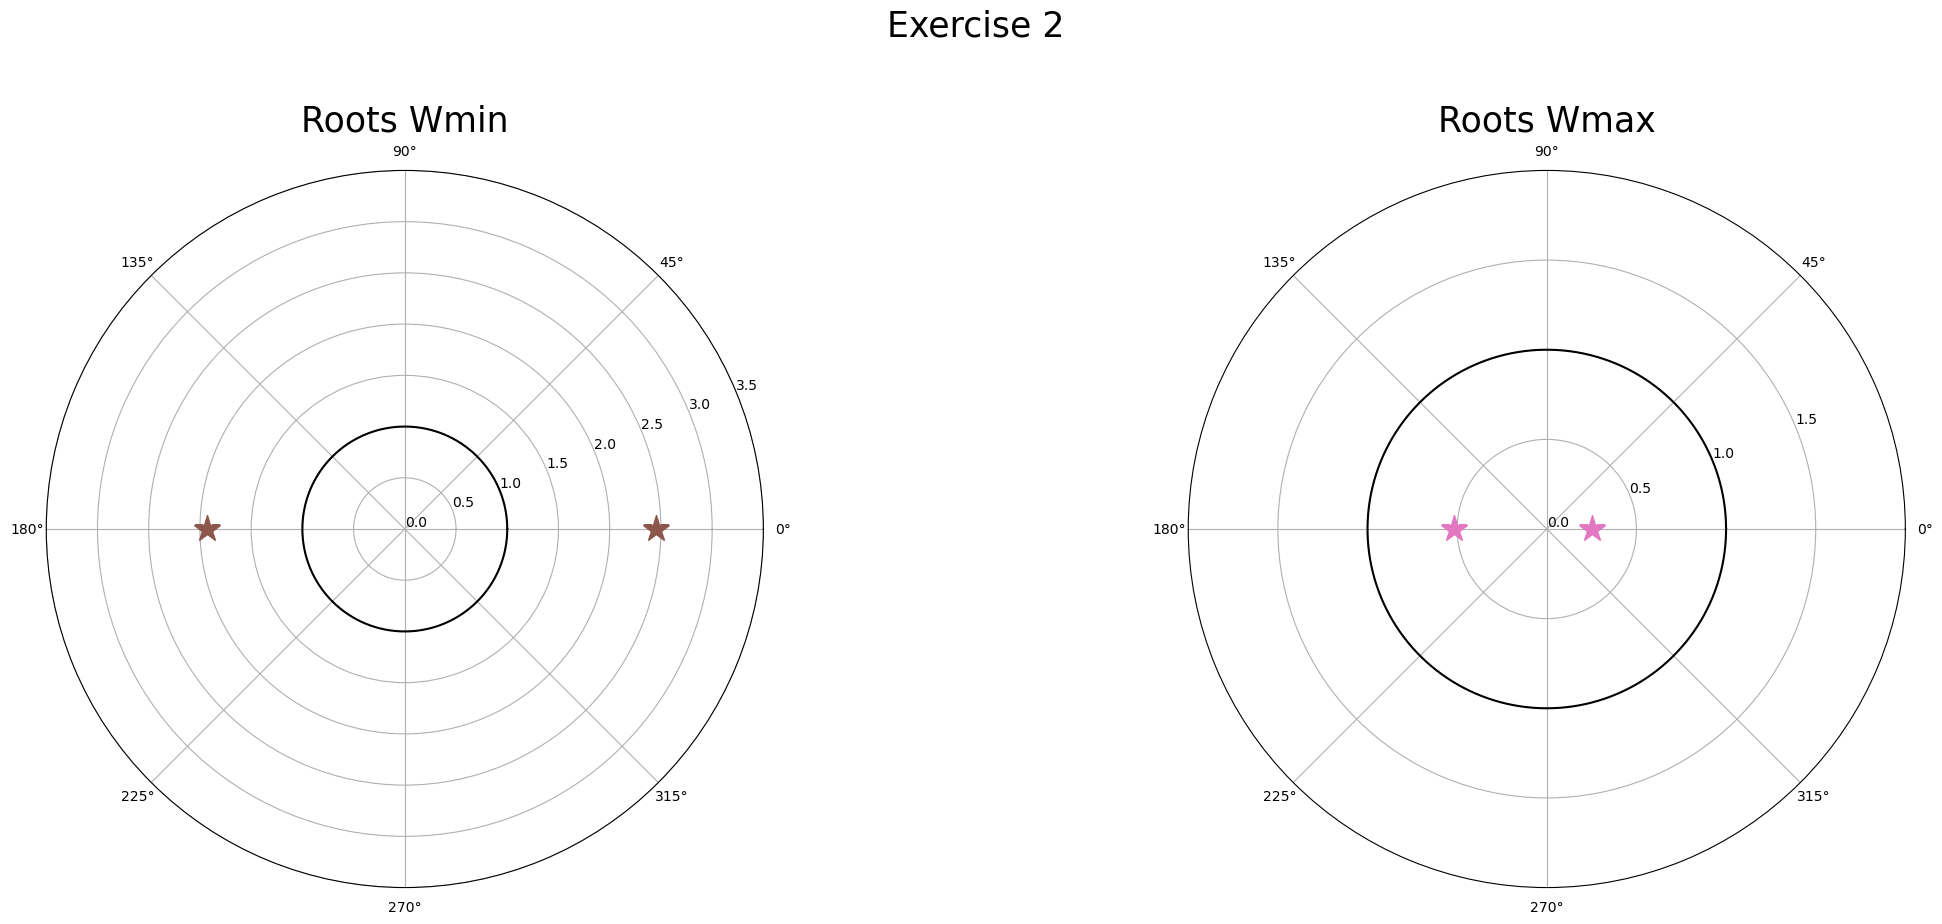

In [9]:
#Plots exercise two#

# Unit circle
dθ=2π/1024; 
θ = collect(0:dθ:2π)
𝓇 = ones(length(θ))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,8), subplot_kw= Dict("projection" => "polar"))
fig.tight_layout(h_pad=3)
fig.suptitle("Exercise 2",fontsize=font_title, y= 1.15 )
axs[1].set_title("Roots Wmin",fontsize=font_title, pad=pad)
axs[1].plot(angle.(roots(wmin)), abs.(roots(wmin)),c=colors[6],"*",markersize=marker_size*2)
axs[1].plot(θ,𝓇, c="k")
axs[1].set_rmax(3.5)
axs[1].set_rticks(collect(0:0.5:3.5))  # Less radial ticks
axs[2].set_title("Roots Wmax",fontsize=font_title, pad=pad)
axs[2].plot(angle.(roots(wmax)), abs.(roots(wmax)),c=colors[7],"*",markersize=marker_size*2)
axs[2].plot(θ,𝓇, c="k")
axs[2].set_rmax(2)
axs[2].set_rticks(collect(0:0.5:1.5));  # Less radial ticks



#### 3. Using wavelet.txt and the seismogram_no_noise.txt. The wavelet and seismogram are sampled every  $\Delta t$ = $0.004$ seconds. Plot all your results versus time axes in seconds and frequency axes in Hertz. 

#### a)

The wavelet, its least-squares inverse  filter and the actual output (the convolution of the wavelet with the filter) for  $\mu$ = $0$ (Trade -off parameter).

In [10]:
w3=vec(readdlm("wavelet.txt"));
s3=vec(readdlm("seismogram_no_noise.txt"));
dt= 0.004 # 4 ms of sampling rate.

fs=1/dt; # Sampling frequency
fn= fs/2; # Nyquist freqyuency

println("Nyquist frequency for the sample rate: $fn Hz")

#=dfw=fs/length(w3);
dfs=fs/length(s3);
fn= fs/2;
=#


Nyquist frequency for the sample rate: 125.0 Hz


In [11]:
# Functions needed for the task (from Assignment 2)


"""
This function computes the Toeplitz matrix "X" associated with two input vectors "x" and "h".

 X=Toeplitz(x,h);
"""
function Toeplitz(x :: Vector{Float64}, h :: Vector{Float64})
     
    Nx=length(x);
    Nh=length(h);
    Ny=Nx+Nh-1;
    
    X=zeros(Ny,Nh);
    
    for i=1:Nh;
        X[i:Nx+(i-1),i]= x
    end
    
    return X;
end



"""
This function computes the convolution of two series x and h as a sum.
"""
function convolution(x :: Vector{Float64} , h :: Vector{Float64}) 
    
    Nx=length(x);
    Nh=length(h);
    Ny=Nx+Nh-1;
    y=zeros(Float64,Ny);
    
    for k=1:Nh;
        for n=1:Nx;
            y[k+n-1]= y[k+n-1]+ h[k]*x[n];
        end
    end
    
    return y

end




"""
This function computes the inverse filter of length N for a signal d using the least square filter approach.

The desired output is y=(1,0,0,0...) with N+Nd-1 samples.
"""
function LS_inverse_filter(N::Int64,d)
    
    f=zeros(Float64,N); # filter variable of size Nx1,
    Ny=length(f)+length(d)-1 #length of desired output.
    y=[1;zeros(Float64,Ny-1)]; # desired output (Ny x 1).
    
    D=Toeplitz(d,f); # Toeplitz matrix of wavelet.
    D_tpose= D'; # Adjoint matrix (Transpose if input matrix is real).
    R= inv(D_tpose*D); # Inverse of the multilpication of D_tpose and D = autocorrelation of wavelet.
    g= D_tpose*y; # cross-correlation between the D_tpose and the desired output y.
    f= R*g; #Inverse filter.
    return f #return inverse filter.
end


LS_inverse_filter

In [12]:
f_inv=LS_inverse_filter(10,w3);
actual_output=convolution(f_inv,w3);

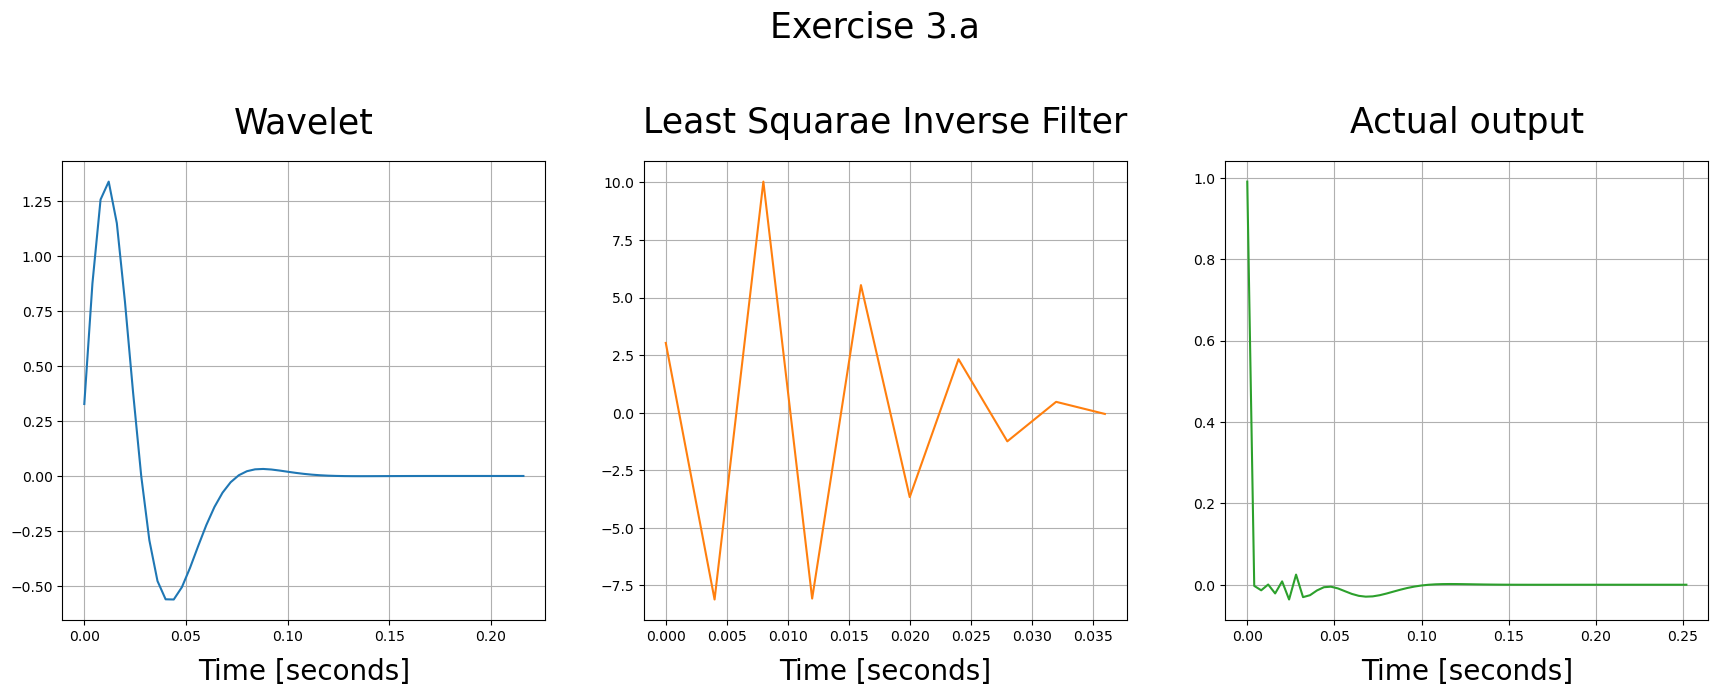

In [13]:
#Plots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
fig.tight_layout(pad=4.0)
fig.suptitle("Exercise 3.a",fontsize=font_title, y=1.15 )
#colors=["orange","green","red","blue"]
axs[1,1].set_title("Wavelet", fontsize=font_title, pad=20.0)
axs[1,1].grid("True")
axs[1,1].plot(dt*collect(0:length(w3)-1),w3,c=colors[1])
#axs[1,1].set_yticks([-2.5,-1.5,0,1.5,2.5])
axs[1,1].set_xlabel("Time [seconds]",fontsize=font_label,labelpad=10.0)
axs[2,1].set_title("Least Squarae Inverse Filter",fontsize=font_title, pad=20.0)
axs[2,1].grid("True")
axs[2,1].plot(dt*collect(0:length(f_inv)-1),f_inv,c=colors[2])
axs[2,1].set_xlabel("Time [seconds]", fontsize=font_label,labelpad=10.0)
#axs[2,1].set_xticklabels(fontsize=font_tick)
axs[3,1].set_title("Actual output", fontsize=font_title, pad=20.0)
axs[3,1].plot(dt*collect(0:length(actual_output)-1),actual_output,c=colors[3])
axs[3,1].set_xlabel("Time [seconds]", fontsize=font_label,labelpad=10.0)
axs[3,1].grid("True")



#### b)

The amplitude spectrum of the wavelet, the least-squares inverse filter and the actual output.

Function to compute the Discrete time Fourier Transform:

In [14]:
"""
DtFT= DtFT (Nk,dt, xn )

Compute the Discrete Time Fourier Transform (Frequency Response) of a signal `xn` using a `dt` time sampling interval
and Nk samples.

Returns `DtFT` which is a `Vector{ComplexF64}` that carries the Discrete time Fourier Transform of the signal.
Returns the digital angular frequency ω, the angular frequency Ω and the frequency f in Hertz.

# Arguments
- ` Nk :: Int64`: the output numer of samples.
- `dt :: Float64`: sampling interval for the discrete signal.
- ` xn :: Vector{Float64}`: discrete time signal.


"""
function DtFT(N :: Int64, dt:: Float64, xn :: Vector{Float64})
    
    ω=zeros(Float64,N)
    ω= [ -π + 2.0*π*(k)/(N)  for k=0:N-1]
   # dω=2π/N;
   # ω= dω*collect(0:1:N-1)

    Ω= ω/dt;
    f= Ω/2π;
    
    DtFT=zeros(ComplexF64,length(ω))
    
    for k in 1:length(ω);
        for n in 1:length(xn)
            DtFT[k]= DtFT[k] + xn[n]*exp(-1im*ω[k]*(n))
        end
    end
    
    return ω, Ω, f, DtFT
end


DtFT

**Testing the code:**

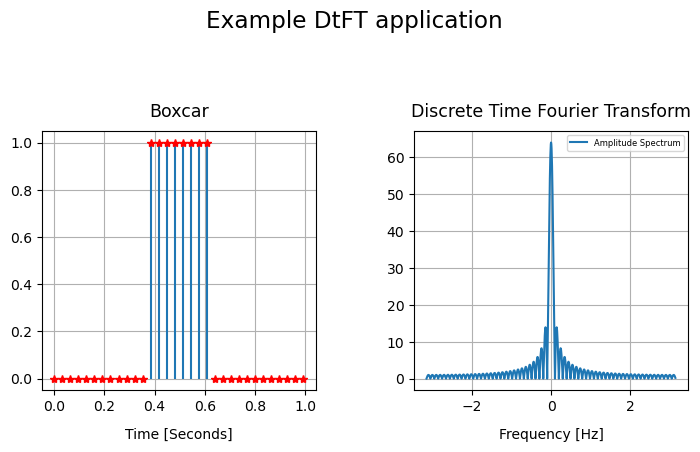

In [15]:

Nk=1024
xn=[ones(32); zeros(Float64,(32)*3)]; # 128 samples
xn=[reverse(xn) ; xn]

ω, Ω, f, Xk= DtFT(Nk,dt,xn);; 


dt=0.004;
t=dt*(0:length(xn)-1)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
fig.tight_layout(pad=4.0)
fig.suptitle("Example DtFT application", fontsize=font_title/1.5, y=1.15 )
axs[1,1].set_title("Boxcar", fontsize=font_title/2, pad=pad)
axs[1,1].grid("True")
axs[1,1].stem(t[1:8:end],xn[1:8:end],markerfmt="*r", basefmt="None")
#axs[1,1].set_yticks([-2.5,-1.5,0,1.5,2.5])
axs[1,1].set_xlabel("Time [Seconds]",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].set_title("Discrete Time Fourier Transform",fontsize=font_title/2, pad=pad)
axs[2,1].grid("True")
axs[2,1].plot(ω,abs.(Xk), label="Amplitude Spectrum" )
axs[2,1].set_xlabel("Frequency [Hz]",fontsize=font_label/2, labelpad=labelpad)

axs[2,1].legend(loc="upper right", fontsize=6);




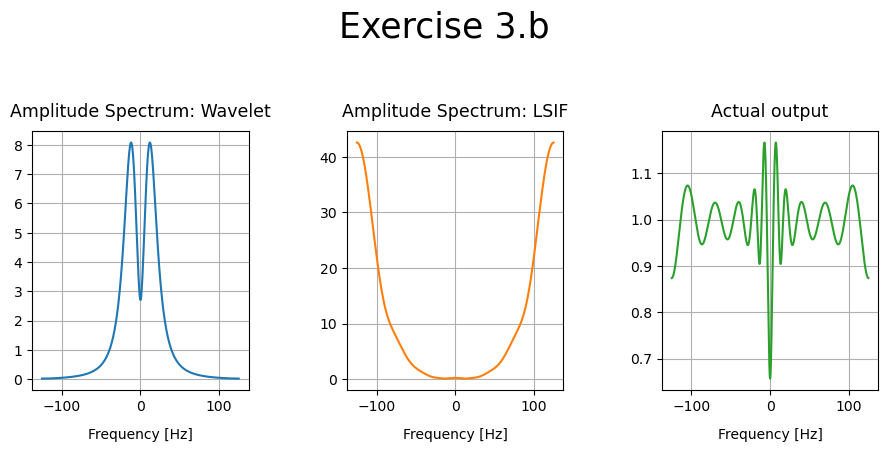

In [17]:
# Compute the DtFT of xn, inv_f and actual output:

ω, Ω, f, Wk= DtFT(Nk,dt,w3);
ω, Ω, f, IFk= DtFT(Nk,dt,f_inv); 
ω, Ω, f, AOk=DtFT(Nk,dt,actual_output);



## Plots ##
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
fig.tight_layout(pad=4.0)
fig.suptitle("Exercise 3.b", fontsize=font_title, y=1.15)
#colors=["orange","green","red","blue"]
axs[1,1].set_title("Amplitude Spectrum: Wavelet",fontsize=font_title/2, pad=pad)
axs[1,1].grid("True")
axs[1,1].plot(f,abs.(Wk), c=colors[1])
axs[1,1].set_xlabel("Frequency [Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].set_title("Amplitude Spectrum: LSIF",fontsize=font_title/2, pad=pad)
axs[2,1].grid("True")
axs[2,1].plot(f, abs.(IFk),c=colors[2])
axs[2,1].set_xlabel("Frequency [Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[3,1].set_title("Actual output",fontsize=font_title/2, pad=pad)
axs[3,1].plot(f,abs.(AOk), c=colors[3])
axs[3,1].set_xlabel("Frequency [Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[3,1].grid("True")



#### c)


Apply the filter to the seismogram and display the estimated
reflectivity series.

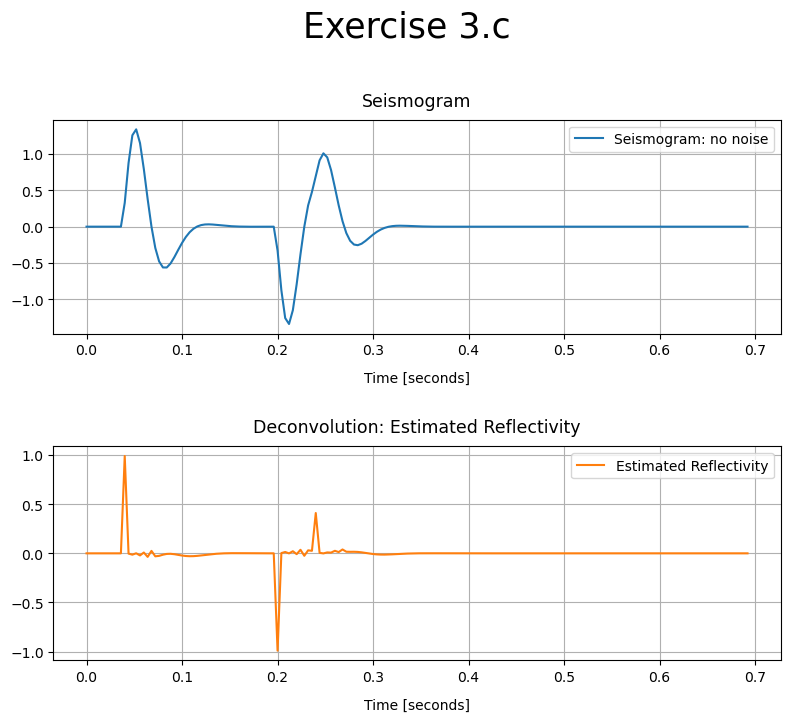

In [18]:
# Deconvolution >>>>> estimated relectivity

estimated_r= convolution(f_inv,s3);
er=estimated_r[1:length(s3)] # TSame number of samples that the seismogram


fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8,6))
fig.tight_layout(h_pad=6.0)
fig.suptitle("Exercise 3.c",fontsize=font_title, y=1.15)
axs[1,1].set_title("Seismogram",fontsize=font_title/2, pad=pad)
axs[1,1].grid("True")
axs[1,1].plot(dt*collect(0:length(s3)-1),s3, c=colors[1],label="Seismogram: no noise")
axs[1,1].set_xlabel("Time [seconds]",fontsize=font_label/2, labelpad=labelpad)
axs[1,1].legend(loc="upper right", fontsize=10);
axs[2,1].set_title("Deconvolution: Estimated Reflectivity",fontsize=font_title/2, pad=pad)
axs[2,1].grid("True")
axs[2,1].plot(dt*collect(0:length(s3)-1),er,c=colors[2], label="Estimated Reflectivity")
axs[2,1].set_xlabel("Time [seconds]",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].legend(loc="upper right", fontsize=10);


#### d)

Compute and display the amplitude spectrum of the seismogram and of the estimated reectivity.

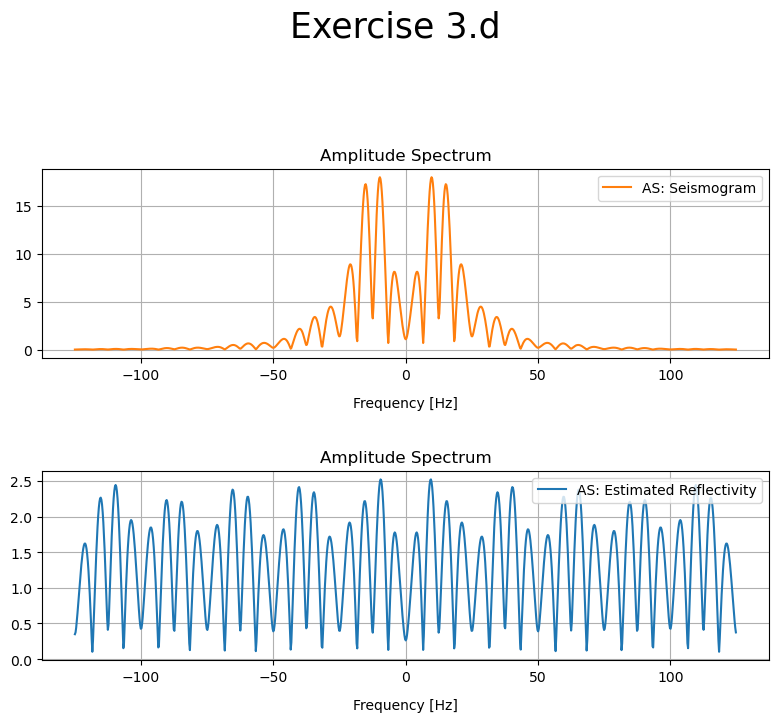

In [19]:
ω, Ω, f, ERk= DtFT(Nk,dt,er);
ω, Ω, f, Sk= DtFT(Nk,dt,s3);

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8,6))
fig.suptitle("Exercise 3.d",fontsize=font_title, y=1.15)
fig.tight_layout(h_pad=6.0)
axs[1,1].set_title("Amplitude Spectrum")
axs[1,1].grid("True")
axs[1,1].plot(f,abs.(Sk),c=colors[2],label="AS: Seismogram")
axs[1,1].legend(loc="upper right", fontsize=10);
axs[1,1].set_xlabel("Frequency [Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].set_title("Amplitude Spectrum")
axs[2,1].plot(f, abs.(ERk),c=colors[1], label="AS: Estimated Reflectivity")
axs[2,1].legend(loc="upper right", fontsize=10);
axs[2,1].set_xlabel("Frequency [Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].grid("True")



#### 4. Using "wavelet.txt" and the "seismogram_with_noise.txt". The wavelet and seismogram are sampled every  $\Delta t$ = $0.004$ seconds. Plot all your results versus time axes in seconds and frequency axes in Hertz. 

In [20]:
# Loaad the data for the exercise:

w4=vec(readdlm("wavelet.txt")); # load data and transform from (length(data),1) >>>> vec(length(data))
s4=vec(readdlm("seismogram_with_noise.txt"));# load data and transform from (length(data),1) >>>> vec(length(data))
dt= 0.004 # 4 ms of sampling rate.

fs=1/dt; # Sampling frequency
fn= fs/2; # Nyquist freqyuency

println("Nyquist frequency for the sample rate: $fn Hz")


Nyquist frequency for the sample rate: 125.0 Hz


#### a)

The wavelet, its least-squares inverse filter and the actual output (the convolution of the wavelet with the filter) for  $\vec{\mu} =(0, 0.01, 0.1, 1.0, 10.0)$

In [21]:
# Damping Least Square Filter.

using LinearAlgebra


"""
This function computes the damping inverse filter of length `N` for a signal `d` using the least square filter approach. The value
for the trade-off parameter is μ=[0,1]
The desired output is y=(1,0,0,0...) with N+Nd-1 samples.
"""
function DLS_inverse_filter(N::Int64,d,μ :: Float64)
    
    f=zeros(Float64,N); # filter variable of size Nx1,
    Ny=length(f)+length(d)-1 #length of desired output.
    y=[1;zeros(Float64,Ny-1)]; # desired output (Ny x 1).
    
    D=Toeplitz(d,f); # Toeplitz matrix of wavelet.
    D_tpose= D'; # Adjoint matrix (Transpose if input matrix is real).
    R= inv(D_tpose*D +μ*I); # Inverse of the multilpication of D_tpose and D = autocorrelation of wavelet.
    g= D_tpose*y; # cross-correlation between the D_tpose and the desired output y.
    f= R*g; #Inverse filter.
    return f, μ #return inverse filter.
end


DLS_inverse_filter

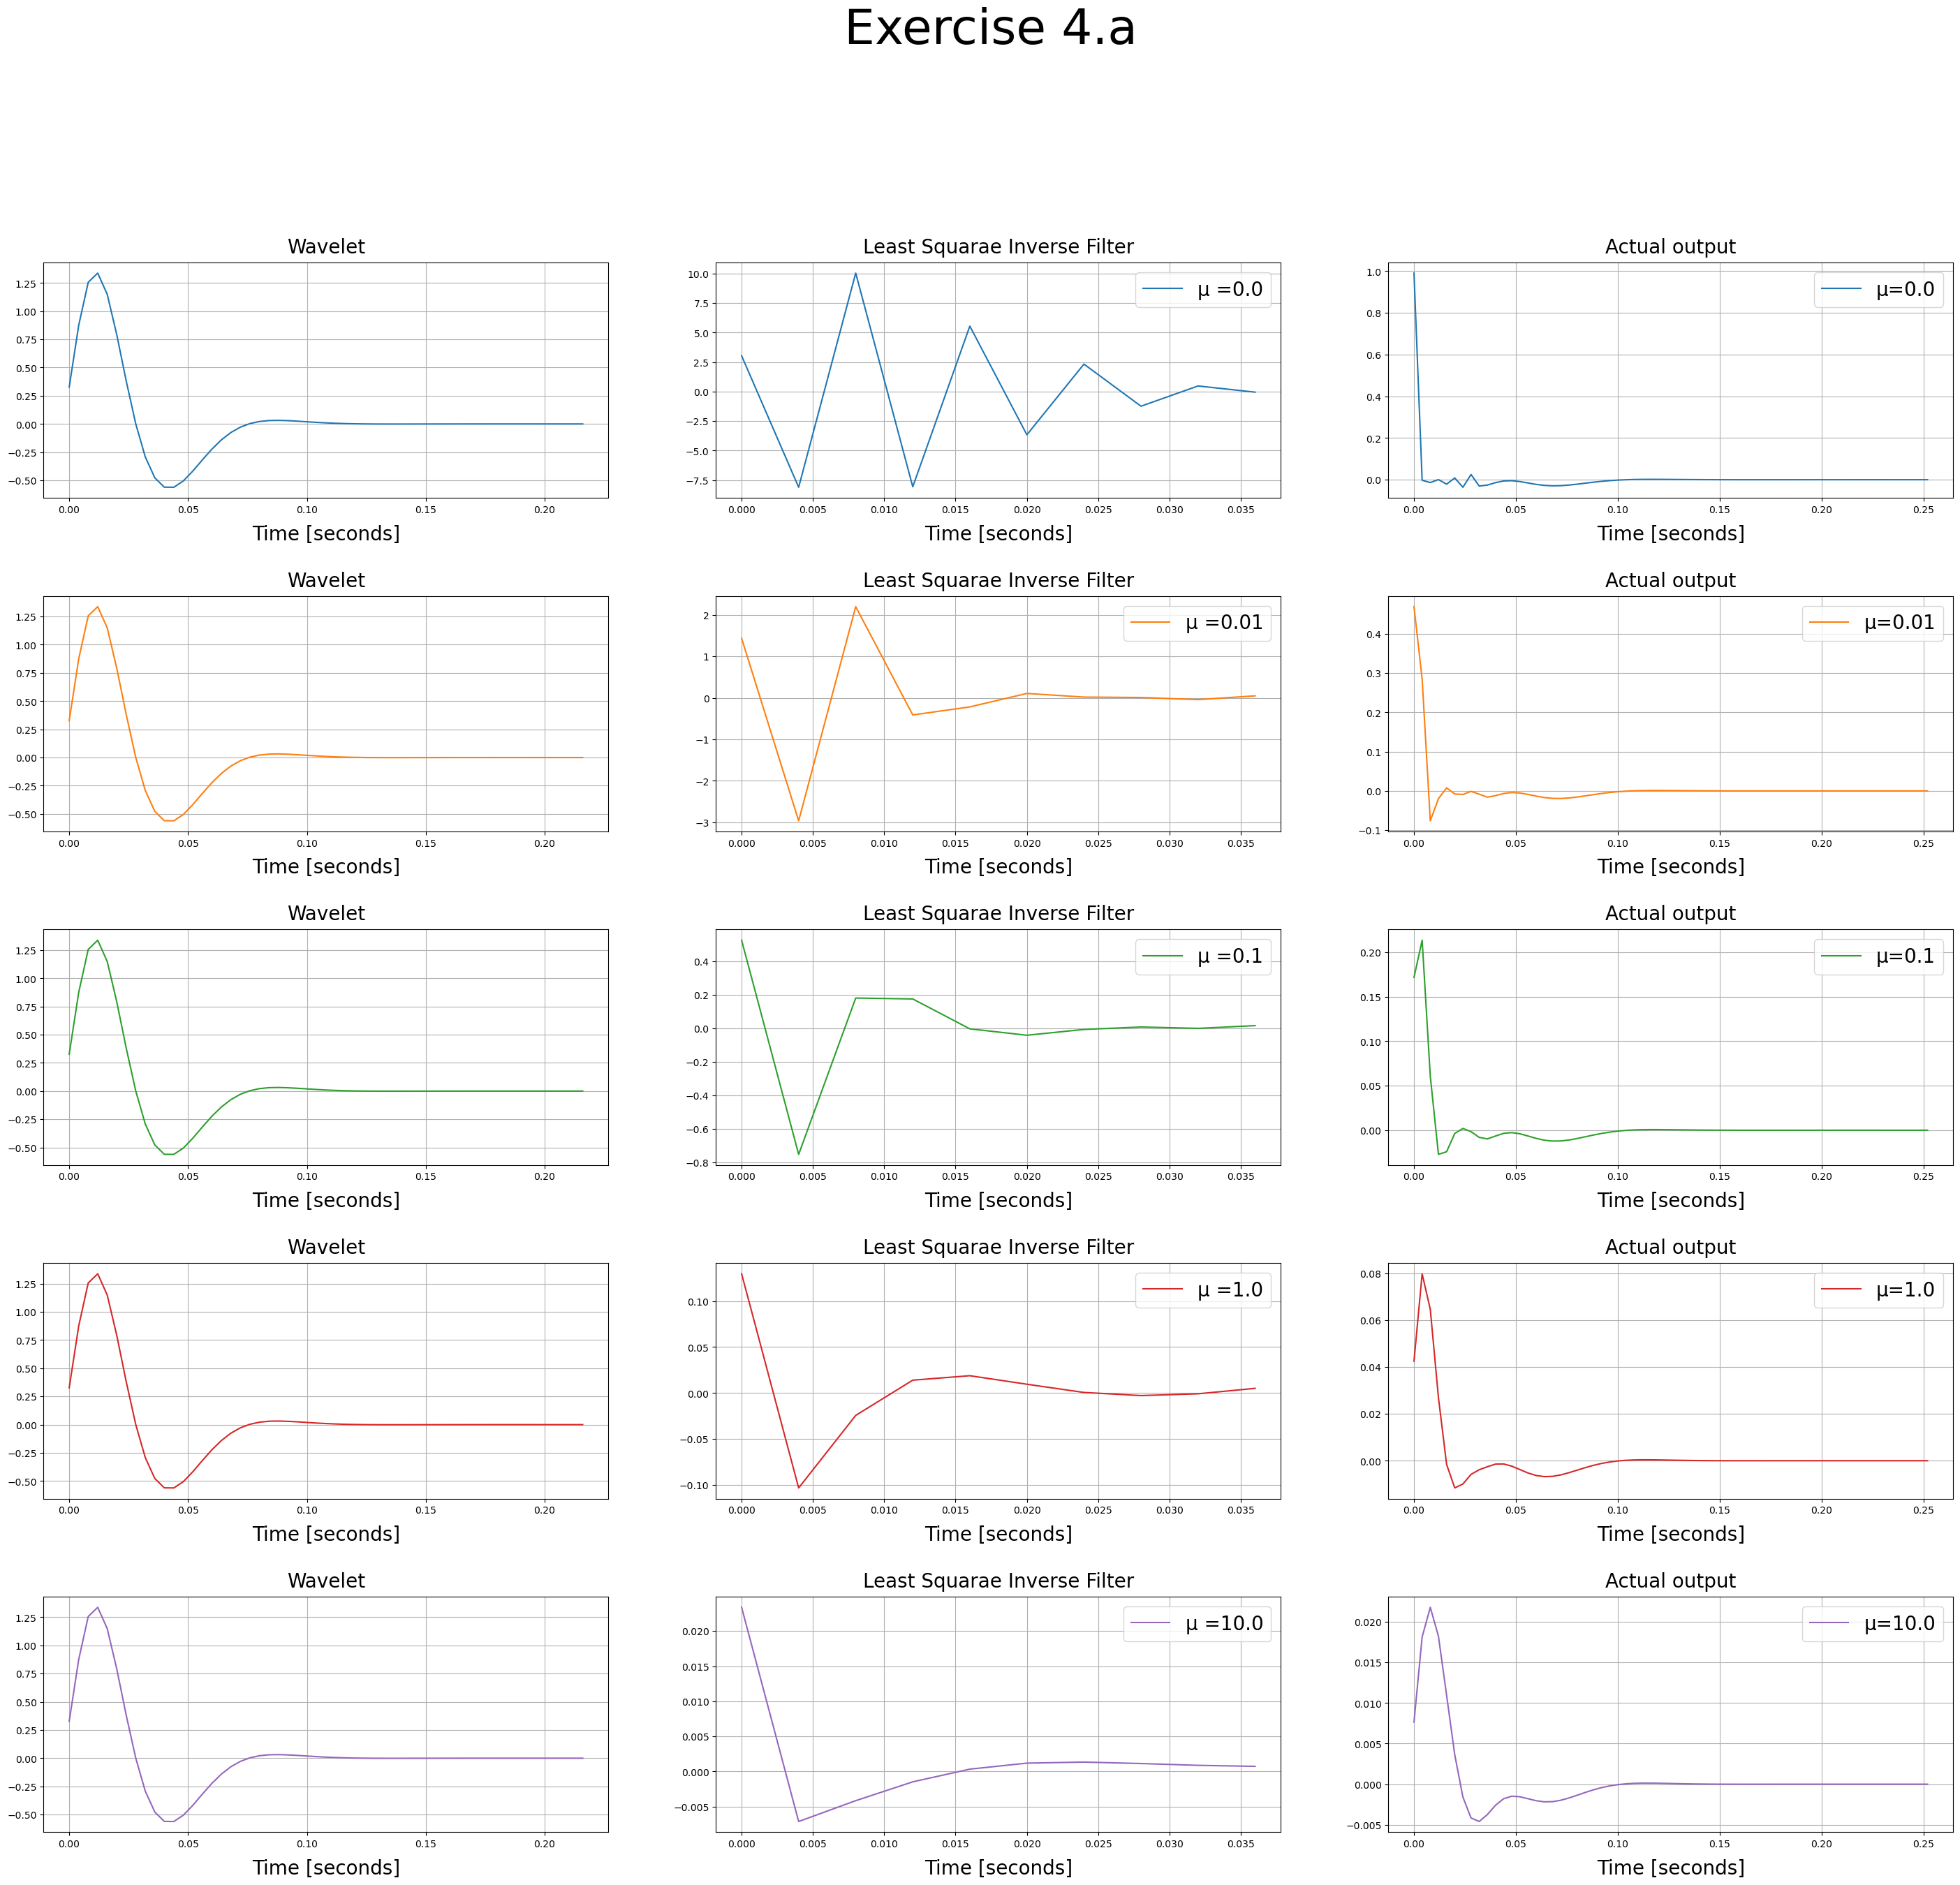

In [22]:
# Compute the DtFT of xn, inv_f and actual output:


μ=[0,0.01,0.1,1,10]; # trade off parameter
Nf=10 # length of inverse filter

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30,25))
fontsize_label=25
fig.tight_layout(pad=8.0)
fig.suptitle("Exercise 4.a",fontsize=font_title*2, y=1.10)

for i in 1:length(μ)
    
    f_inv, trade_off=DLS_inverse_filter(Nf,w4,μ[i]);
    actual_output=convolution(f_inv,w4);
    axs[i,1].set_title("Wavelet", fontsize=font_label, pad=pad)
    axs[i,1].grid("True")
    axs[i,1].plot(dt*collect(0:length(w4)-1),w4,c=colors[i])
    axs[i,1].set_xlabel("Time [seconds]",fontsize=font_label, labelpad=labelpad)
    axs[i,2].set_title("Least Squarae Inverse Filter",fontsize=font_label, pad=pad)
    axs[i,2].grid("True")
    axs[i,2].plot(dt*collect(0:length(f_inv)-1),f_inv,c=colors[i], label="μ =$trade_off")
    axs[i,2].set_xlabel("Time [seconds]",fontsize=font_label, labelpad=labelpad)
    axs[i,2].legend(loc="upper right", fontsize=20);
    axs[i,3].set_title("Actual output",fontsize=font_label, pad=pad)
    axs[i,3].plot(dt*collect(0:length(actual_output)-1),actual_output,c=colors[i], label= "μ=$trade_off")
    axs[i,3].set_xlabel("Time [seconds]",fontsize=font_label, labelpad=labelpad)
    axs[i,3].legend(loc="upper right", fontsize=20);
    axs[i,3].grid("True")
end



#### b)
The amplitude spectrum of the wavelet, the least-squares inverse filter and actual output for $\vec{\mu} =(0, 0.01, 0.1, 1.0, 10.0)$

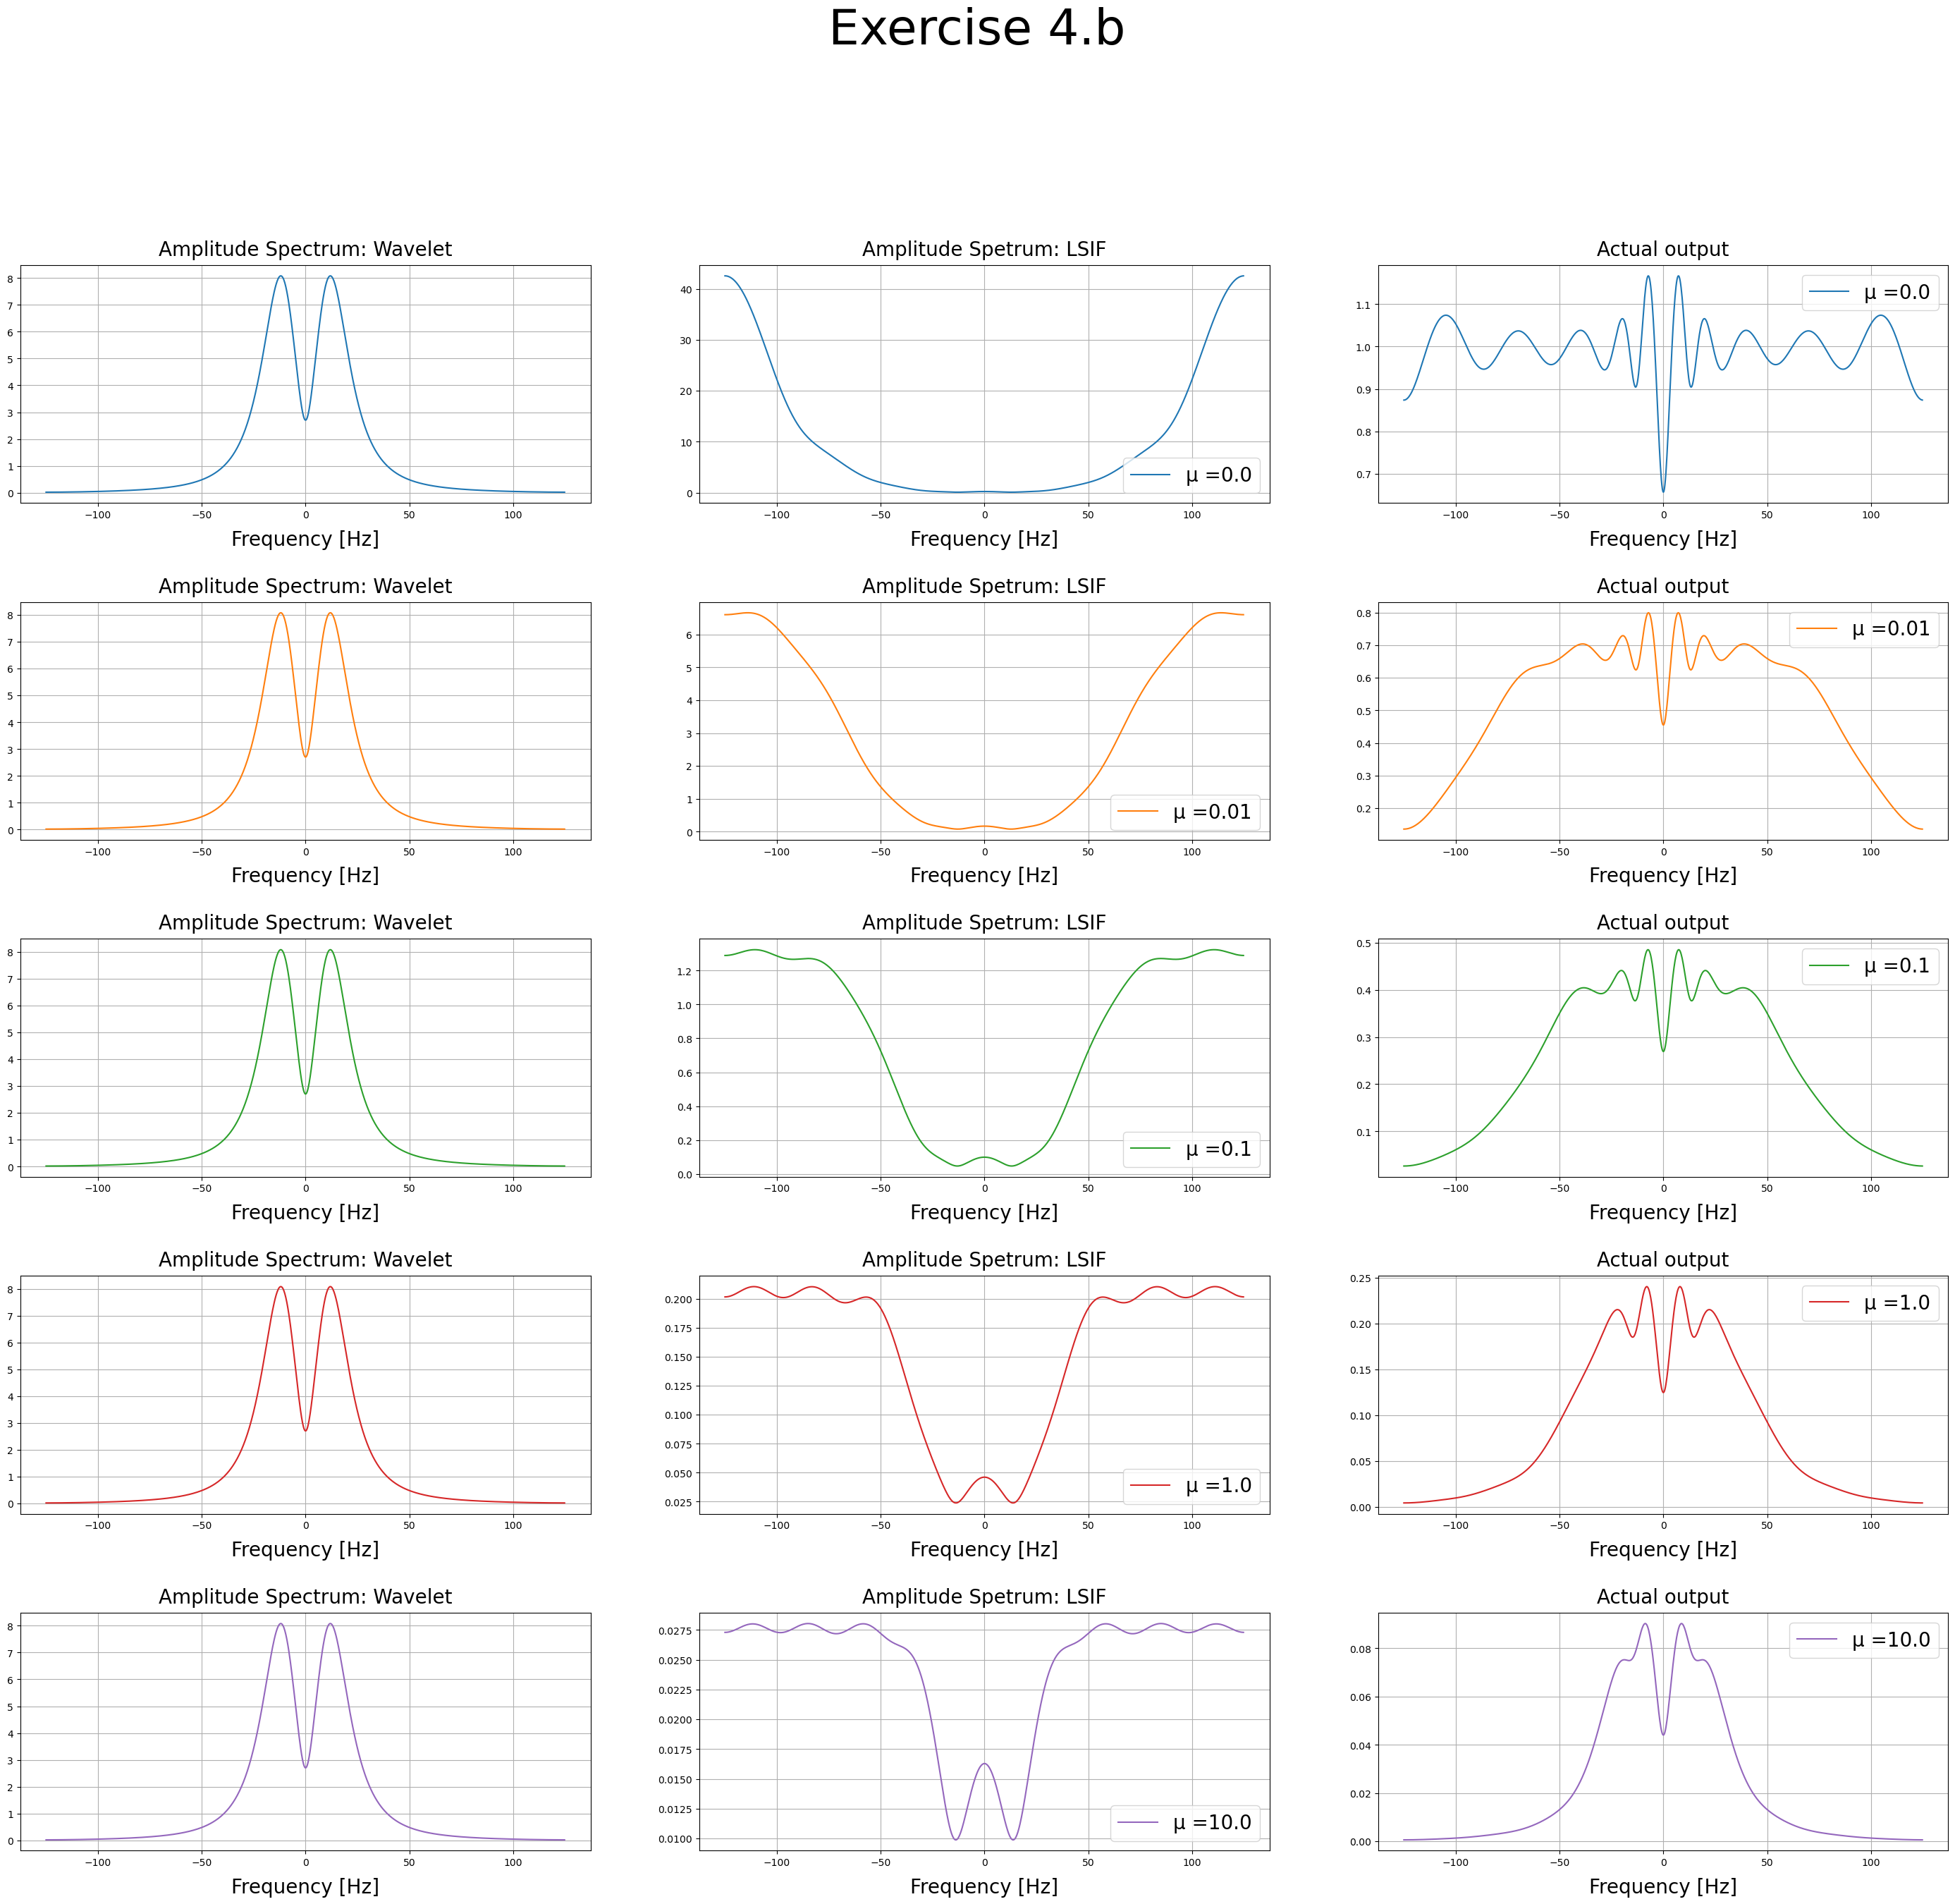

In [23]:
# Compute the DtFT of xn, inv_f and actual output:


dt= 0.004 # seconds
μ=[0,0.01,0.1,1,10]; # Trade-off parameter


fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30,25))
fontsize_label=25
fig.tight_layout(pad=8.0)
fig.suptitle("Exercise 4.b",fontsize=font_title*2, y=1.10)

for i in 1:length(μ)
    
    f_inv, trade_off=DLS_inverse_filter(Nf,w4,μ[i]);
    actual_output=convolution(f_inv,w4);
    ω, Ω, f, Wk= DtFT(Nk,dt,w4);
    ω, Ω, f, IFk= DtFT(Nk,dt,f_inv); 
    ω, Ω, f, AOk=DtFT(Nk,dt,actual_output);
    axs[i,1].set_title("Amplitude Spectrum: Wavelet", fontsize=font_label, pad=pad)
    axs[i,1].grid("True")
    axs[i,1].plot(f,abs.(Wk), c=colors[i], label="μ =$trade_off")
    axs[i,1].set_xlabel("Frequency [Hz]",fontsize=font_label, labelpad=labelpad)
    axs[i,2].set_title("Amplitude Spetrum: LSIF", fontsize=font_label, pad=labelpad)
    axs[i,2].grid("True")
    axs[i,2].plot(f, abs.(IFk),c=colors[i], label="μ =$trade_off")
    axs[i,2].set_xlabel("Frequency [Hz]", fontsize=font_label, labelpad=labelpad)
    axs[i,2].legend(loc="lower right", fontsize=20);
    axs[i,3].set_title("Actual output", fontsize=font_label, pad=pad)
    axs[i,3].plot(f,abs.(AOk), c=colors[i], label="μ =$trade_off")
    axs[i,3].set_xlabel("Frequency [Hz]",fontsize=font_label, labelpad=labelpad)
    axs[i,3].legend(loc="upper right", fontsize=20);
    axs[i,3].grid("True")
end


#### c)

Apply the filter to the seismogram and display the estimated
reectivity series for for  $\vec{\mu} =(0, 0.01, 0.1, 1.0, 10.0)$

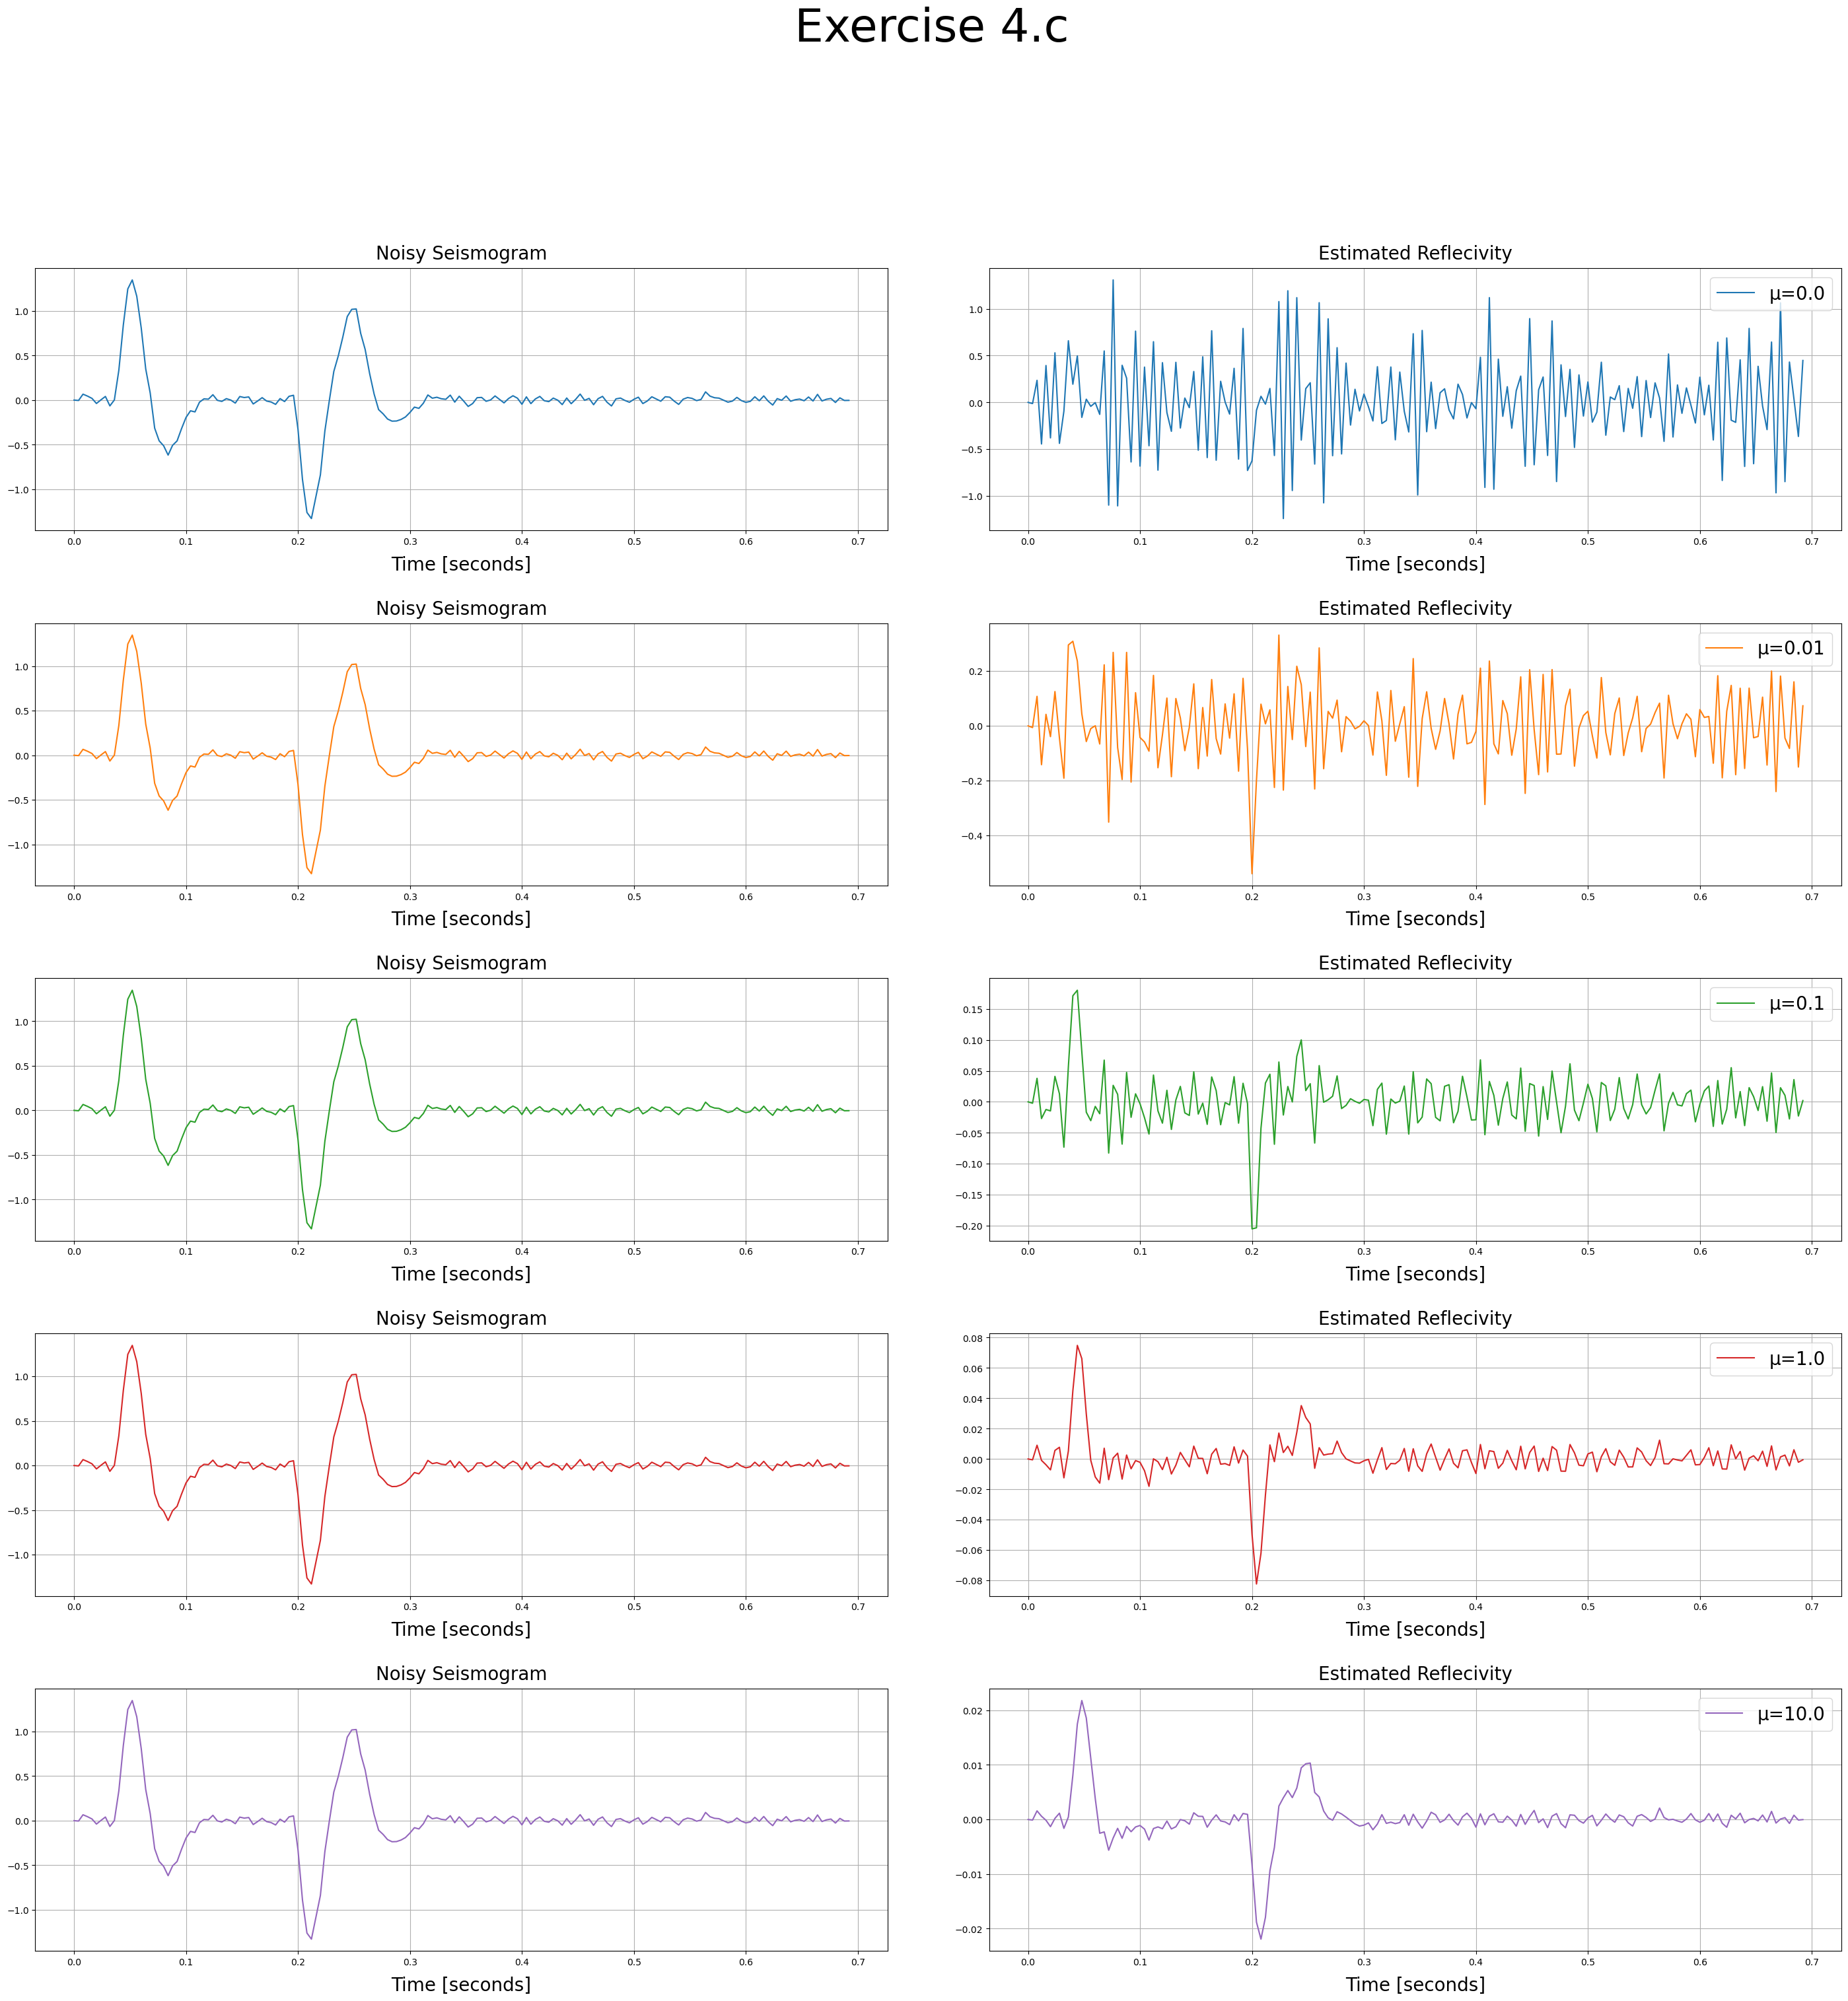

In [24]:
# Deconvolution >>>>> estimated relectivity



dt= 0.004 # seconds
μ=[0,0.01,0.1,1,10]; # Trade-off parameter


fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30,28))
fontsize_label= 25
fig.tight_layout(pad=8.0)
fig.suptitle("Exercise 4.c",fontsize=font_title*2, y=1.10)

for i in 1:length(μ)
    
    f_inv, trade_off=DLS_inverse_filter(Nf,w4,μ[i]);
    estimated_r= convolution(f_inv,s4);
    er=estimated_r[1:length(s4)] # TSame number of samples that the seismogram
    
    axs[i,1].set_title("Noisy Seismogram",fontsize=font_label, pad=pad)
    axs[i,1].grid("True")
    axs[i,1].plot(dt*collect(0:length(s4)-1),s4, c=colors[i])
    axs[i,1].set_xlabel("Time [seconds]",fontsize=font_label, labelpad=labelpad)
    axs[i,2].set_title("Estimated Reflecivity",fontsize=font_label, pad=labelpad)
    axs[i,2].grid("True")
    axs[i,2].plot(dt*collect(0:length(s4)-1),er,c=colors[i], label="μ=$trade_off")
    axs[i,2].set_xlabel("Time [seconds]",fontsize=font_label, labelpad=labelpad)
    axs[i,2].legend(loc="upper right", fontsize=20);
end



#### d)

Compute and display amplitude spectrum of the seismogram and of the estimated reflectivity  $\vec{\mu} =(0, 0.01, 0.1, 1.0, 10.0)$

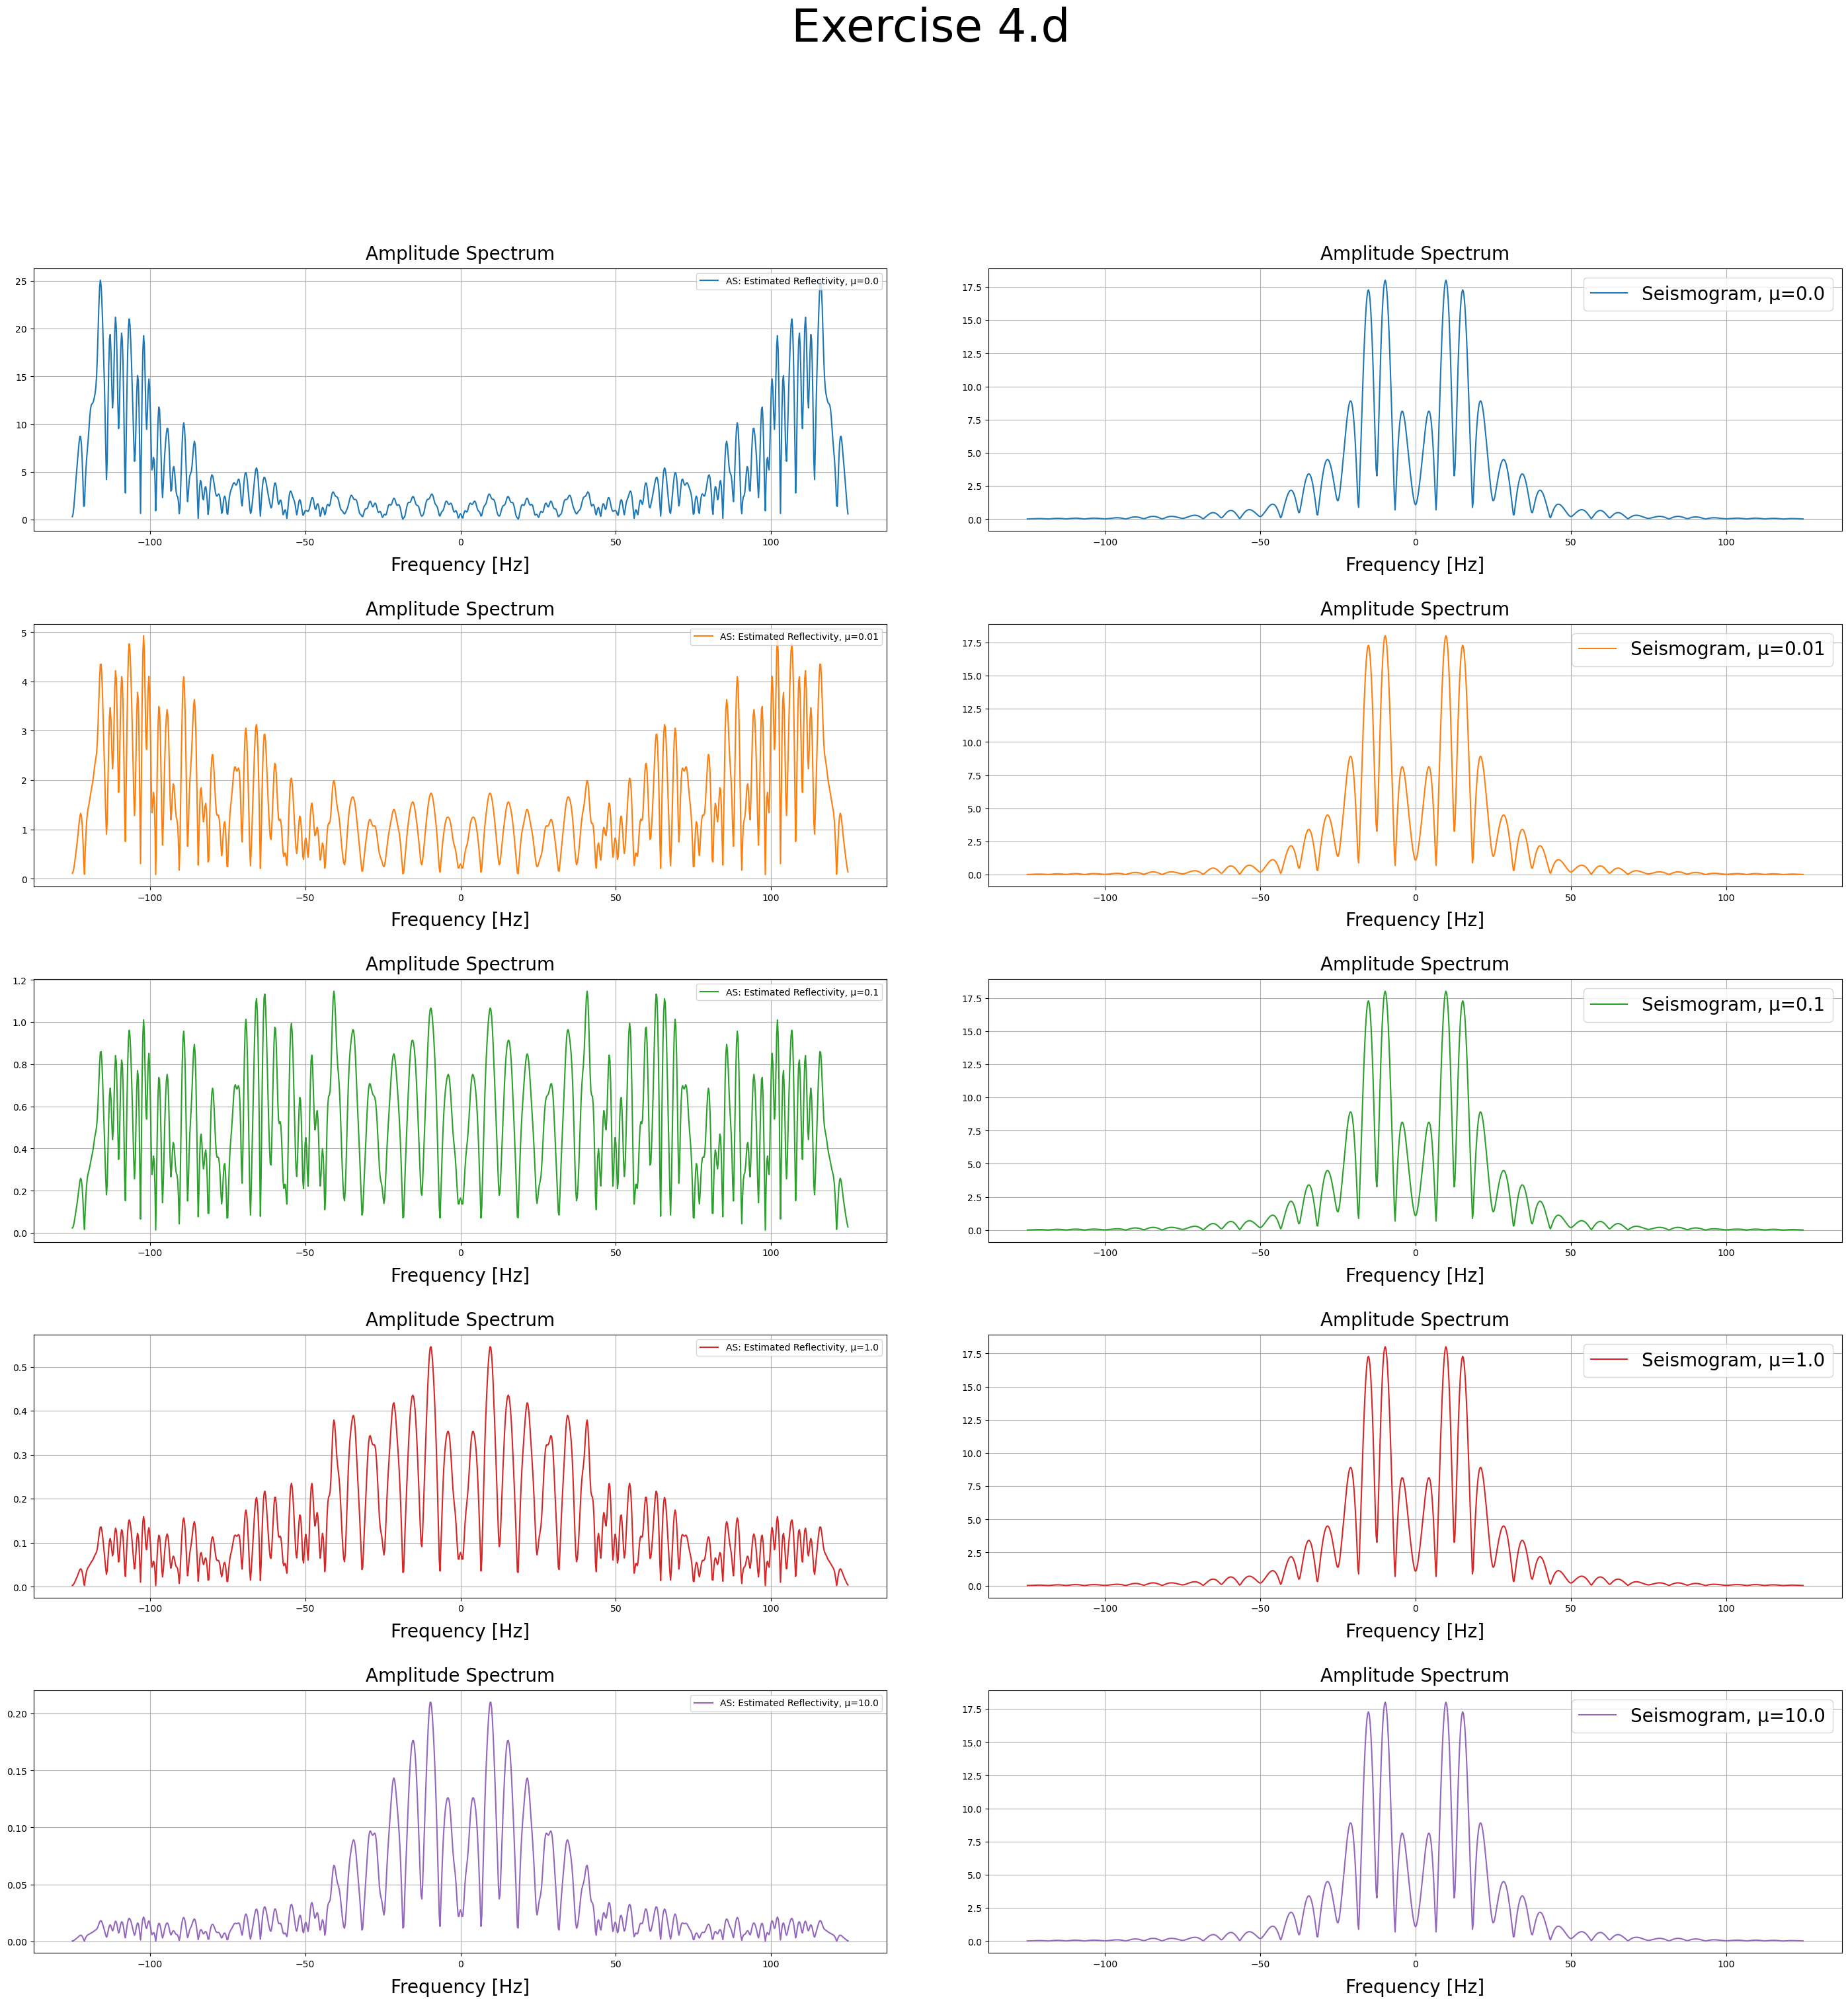

In [25]:
# Deconvolution >>>>> estimated relectivity



dt= 0.004 # seconds
μ=[0,0.01,0.1,1,10]; # Trade-off parameter


fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30,28))
fontsize_label= 25
fig.tight_layout(pad=8.0)
fig.suptitle("Exercise 4.d",fontsize=font_title*2, y=1.10)


for i in 1:length(μ)
    
    f_inv, trade_off=DLS_inverse_filter(Nf,w4,μ[i]);
    estimated_r= convolution(f_inv,s4);
    er=estimated_r[1:length(s4)] # TSame number of samples that the seismogram
    ω, Ω, f, ERk= DtFT(Nk,dt,er);
    ω, Ω, f, Sk= DtFT(Nk,dt,s3);
    
    axs[i,1].set_title("Amplitude Spectrum",fontsize=font_label, pad=pad)
    axs[i,1].grid("True")
    axs[i,1].plot(f, abs.(ERk),c=colors[i], label="AS: Estimated Reflectivity, μ=$trade_off",)
    axs[i,1].legend(loc="upper right", fontsize=10);
    axs[i,1].set_xlabel("Frequency [Hz]",fontsize=font_label, labelpad=labelpad)

    axs[i,2].set_title("Amplitude Spectrum",fontsize=font_label, pad=pad)
    axs[i,2].grid("True")
    axs[i,2].plot(f,abs.(Sk),c=colors[i],label="Seismogram, μ=$trade_off")
    axs[i,2].set_xlabel("Frequency [Hz]",fontsize=font_label, labelpad=labelpad)
    axs[i,2].legend(loc="upper right", fontsize=20);
end



#### e)

Discuss results and in particular the role of the trade-off parameter:




The parameter $\mu$ is a regularization parameter that establishes a trade-off relation between stability and resolution (collapse of the wavelet to a spike) for the actual output in the deconvolution process.

The effect of $\mu$ can be discussed from a mathematical perspective from the z-transform of the process of deconvolution for signal with noise.


We know that:


$$ S\left(Z\right) = W\left(Z\right)R\left(Z\right) + N\left(Z\right)$$


where:

$S\left(Z\right)$ is the z-transform of the seismic trace or seismogram.

$W\left(Z\right)$ is the z-transform of the wavelet.

$R\left(Z\right)$ is the z-transform of the reflectivity.

$N\left(Z\right)$ is the z-transform of the noise.

If we compute an inverse filter to deconvolve the seismogram and obtain the impulse response of the earth (reflectivity):


$$ F\left(Z\right)S\left(Z\right) = F\left(Z\right)W\left(Z\right)R\left(Z\right) + F\left(Z\right)N\left(Z\right)$$

where

$F\left(Z\right)= W^{-1}\left(Z\right)$ is the inverse of the wavelet.

$$ W^{-1}\left(Z\right)S\left(Z\right) = R\left(Z\right) +\frac{N\left(Z\right)}{W\left(Z\right)}$$


Therefore, if $W\left(Z\right)\to 0$, instability problems will appear and the noise of the signal will be amplified. Consequently, the deconvolution will not be effective and we will not recover the reflectivity.

**Example:**

**We can freely choose the length of the inverse filter. We want a sharp filter to generate an output that is a compressed version of the wavelet**. This will increase or equalize the energy for the different frequencies.



As we can see in **Exercise 4.c** **if we set $\mu$ =$0$ the estimated reflectivity looks noisy since the noise is amplified due to the multiplication in the frequency domain with the filter spectrum**. On the other hand, choosing  $\mu$ =$10, 20, 25...$ we observe that **The estimated reflectivity becomes similar to the seismogram, which means that the operation is not having the effect of compressing the wavelet.**. An intermediate value of $\mu$ for the trade-off parameter seems to work fine since it establish an equilibrium point between the stability (the amplified noise) and the resolution (how well is the wavelet compressed).

There are several ways to understand this problem:


1. We can see how the coefficient of the inverse filter $f$ are related to the parameter $\mu$:



$\vec{f}=(D^{T}D+ \mu I)^{-1}D^{T}\vec{d}$.


If $\mu$ >>> $D^{T}D$ we can throw the term $D^{T}D$ and we obtain:

$\vec{f}=(\mu I)^{-1}D^{T}\vec{d}= \frac{D^{T}\vec{d}}{\mu}$

Therefore, we obtain an inverse relation between $f$ and $\mu$. The following plot shows that coefficient of $f$ are small if $\mu$ is large.

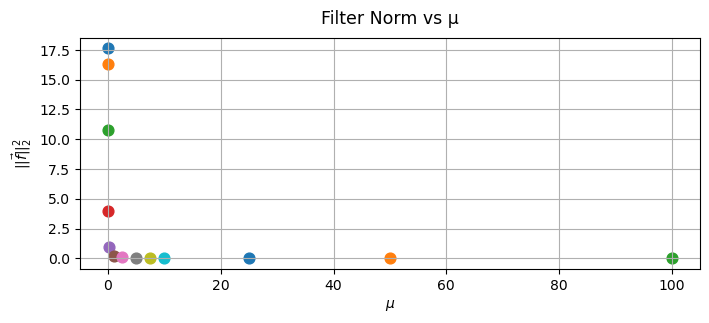

In [26]:
#First Plot

μ=[0,0.0001,0.001,0.01,0.1,1,2.5,5,7.5,10,25,50,100]; # Trade-off parameter

fig = plt.figure(figsize=(8, 3))
norm_f=0.0;
for i in 1:length(μ)
    global norm_f
    f_inv, trade_off=DLS_inverse_filter(20,w4,μ[i]);
    norm_f=norm(f_inv,2);
    plt.scatter(trade_off,norm_f,marker="o", s=60)
    plt.grid("True")
    plt.title("Filter Norm vs μ", fontsize=font_title/2, pad=pad)
    plt.ylabel(L"\||\vec{f}\||^{2}_{2}")
    plt.xlabel(L"\mu")
end



2. Another way to see the relation between resolution and stability is **analyzing the difference between the actual output and the desired output. This difference will increase when $\mu$ increases because the increment in the trade-off parameter reduces the resolution and consequently it causes the modeled error $\|\vec{e}\|^{2}_{2}$ to be larger**.

Ploting the the modeled error vs the trade-off parameter:



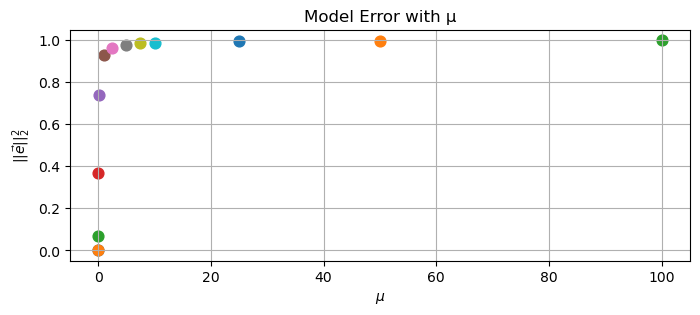

In [27]:
#Second Plot

μ= [0.0,0.0001,0.001,0.01,0.1,1,2.5,5,7.5,10,25,50,100]; # Trade-off parameter

fig = plt.figure(figsize=(8, 3))

for i in 1:length(μ)
    f_inv, trade_off=DLS_inverse_filter(20,w4,μ[i]);
    Ny=length(f_inv)+length(w4)-1 #length of desired output.
    desired_output=[1;zeros(Float64,Ny-1)]; # desired output (Ny x 1).
    actual_output= convolution(f_inv,w4);
    e= actual_output .- desired_output;  #error 
    eRMS= e'*e; #root mean square
    scatter(trade_off,eRMS, marker="o",s=60) 
    title("Model Error with μ")
    plt.grid("True")
    plt.ylabel(L"\||\vec{e}\||^{2}_{2}")
    plt.xlabel(L"\mu")
end



3. Another approach is to observe the modeled error and the norm of the filter. A large value $\|\vec{f}\|^{2}_{2}$ (norm of the filter) is related small value of $\mu$, and with a small $\|\vec{e}\|^{2}_{2}$ (modeled error). Larger values of  $\mu$ are related to larger values for the modeled errors and small values for the norm filter.


The relation between can be plotted as an L-curve:





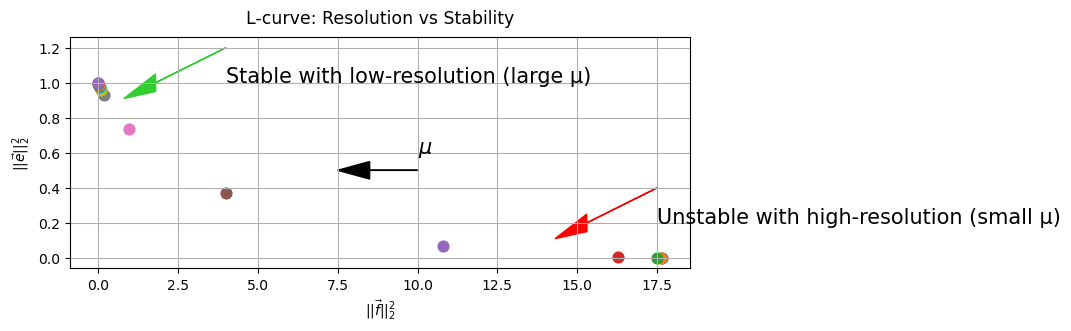

In [28]:
#Third Plot

μ= [0,0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2.5,5,7.5,10,25,50,100]; # Trade-off parameter


fig = plt.figure(figsize=(8, 3))

for i in 1:length(μ)
    f_inv, trade_off=DLS_inverse_filter(20,w4,μ[i]);
    Ny=length(f_inv)+length(w4)-1 #length of desired output.
    desired_output=[1;zeros(Float64,Ny-1)]; # desired output (Ny x 1).
    actual_output= convolution(f_inv,w4);
    e= actual_output .- desired_output;  #error 
    eRMS= e'*e; #root mean square
    norm_f=norm(f_inv,2);
    plt.scatter(norm_f,eRMS,marker="o", s=60) 
    plt.title("L-curve: Resolution vs Stability", pad=pad, fontsize=font_title/2)
    plt.grid("True")
    plt.ylabel(L"\||\vec{e}\||^{2}_{2}")
    plt.xlabel(L"\||\vec{f}\||^{2}_{2}")
    

end


arrow(4.0,1.2, -2.2, -0.2, head_width=.1, head_length=1., linewidth=1, color="LimeGreen")
text(4.0,1.0,"Stable with low-resolution (large μ)",fontsize=15)
arrow(10,0.5, -1.5, 0.00001, head_width=.1, head_length=1., linewidth=1, color="k")
text(10,0.6,L"\mu",fontsize=15)
arrow(17.5,0.4, -2.2, -0.2, head_width=.1, head_length=1., linewidth=1, color="red")
text(17.5,0.2,"Unstable with high-resolution (small μ)",fontsize=15);

#### END